In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import shap
from sklearn.model_selection import train_test_split
from scipy.stats import stats
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import datetime
import seaborn as sns
import pickle
import matplotlib.patches as mpatches
from optbinning import OptimalBinning
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import skorecard

import warnings
warnings.filterwarnings('ignore')


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`


In [1]:
import os
os.getcwd()

'C:\\Users\\User\\Desktop\\Mandiri'

In [3]:
file = "C:\\Users\\User\\Desktop\\Mandiri\\Mandiri.xlsx"
xl = pd.ExcelFile(file)
print(xl.sheet_names)

['Behavior+Demografi', 'Var Beh+Dem', 'Transaksi', 'Var Transaksi', 'Keterangan', 'Mapping']


In [4]:
d1 = xl.parse('Behavior+Demografi')
d2 = xl.parse('Transaksi')
data_dict_1 = xl.parse('Var Beh+Dem')
data_dict_2 = xl.parse('Var Transaksi')
data_dict_3 = xl.parse('Keterangan')
data_dict_4 = xl.parse('Mapping')

In [5]:
pd.set_option('display.max_rows', None)
print(d1.dtypes)

ID                                  object
date_time_posisi_PD         datetime64[ns]
GBI                                float64
max_kol                              int64
open_date                   datetime64[ns]
MATDAT                      datetime64[ns]
mchar1                             float64
mchar2                             float64
mchar3                             float64
mchar4                             float64
mchar5                               int64
mchar6                               int64
mchar7                               int64
mchar8                               int64
mchar9                               int64
mchar10                              int64
mchar11                              int64
mchar12                              int64
mchar13                              int64
mchar14                              int64
mchar15                              int64
mchar16                              int64
mchar17                              int64
mchar18    

In [6]:
d1["GBI"]= pd.to_numeric(d1["GBI"])

In [146]:
d1.mchar1 = d1.mchar1.replace(regex=[','], value='.')
d1.mchar2 = d1.mchar2.replace(regex=[','], value='.')
d1.mchar3 = d1.mchar3.replace(regex=[','], value='.')
d1.mchar4 = d1.mchar4.replace(regex=[','], value='.')

In [147]:
print(d1.mchar3)

0        0.778286202
1                0.8
2        0.687500007
3        0.475516788
4        0.802132348
5        0.814850144
6        0.776265968
7        0.875503722
8        0.869326632
9           0.583327
10          0.533326
11       0.537673913
12       0.557731786
13       0.702902406
14       0.659828251
15       0.615448906
16       0.569724823
17       0.522615254
18       0.474078218
19       0.424070462
20        0.37254742
21       0.319463179
22       0.264770432
23        0.73569625
24       0.680140938
25       0.624585625
26       0.569030313
27          0.513475
28       0.457919688
29       0.402364375
30       0.346809063
31        0.29125375
32       0.235698438
33       0.180143125
34       0.124587813
35          0.759068
36          0.811112
37         0.7611128
38         0.6611144
39       0.542805769
40       0.494914038
41               0.9
42       0.638058509
43         -0.029453
44        -0.0664903
45               0.9
46       0.733613548
47        0.6

In [10]:
d1.GBI

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
30      0.0
31      0.0
32      0.0
33      0.0
34      0.0
35      0.0
36      0.0
37      0.0
38      0.0
39      0.0
40      1.0
41      1.0
42      0.5
43      0.0
44      0.0
45      0.0
46      0.0
47      0.0
48      0.0
49      0.0
50      0.0
51      0.0
52      0.0
53      0.0
54      0.0
55      0.0
56      0.0
57      0.0
58      0.0
59      0.0
60      0.0
61      0.0
62      0.0
63      0.0
64      0.0
65      0.0
66      0.5
67      0.5
68      0.0
69      0.0
70      0.0
71      0.0
72      0.0
73      0.0
74      0.0
75      0.0
76      0.5
77      0.5
78      0.5
79      0.5
80      0.5
81      0.5
82      1.0
83  

In [150]:
d1.mchar36 = d1.mchar36.replace(regex=[','], value='.')
d1.mchar37 = d1.mchar37.replace(regex=[','], value='.')
d1.mchar38 = d1.mchar38.replace(regex=[','], value='.')
d1.mchar40 = d1.mchar40.replace(regex=[','], value='.')
d1.mchar44 = d1.mchar44.replace(regex=[','], value='.')
d1.mchar46 = d1.mchar46.replace(regex=[','], value='.')

In [151]:
#List = ["mchar36","mchar37","mchar38","mchar40","mchar44","mchar46"]
d1.mchar36 = pd.to_numeric(d1.mchar36)
d1.mchar37 = pd.to_numeric(d1.mchar37)
d1.mchar38 = pd.to_numeric(d1.mchar38)
d1.mchar40 = pd.to_numeric(d1.mchar40)
d1.mchar44 = pd.to_numeric(d1.mchar44)
d1.mchar46 = pd.to_numeric(d1.mchar46)

In [8]:
pd.set_option('display.max_rows', None)
print(d1.dtypes)

ID                                  object
date_time_posisi_PD         datetime64[ns]
GBI                                float64
max_kol                              int64
open_date                   datetime64[ns]
MATDAT                      datetime64[ns]
mchar1                             float64
mchar2                             float64
mchar3                             float64
mchar4                             float64
mchar5                               int64
mchar6                               int64
mchar7                               int64
mchar8                               int64
mchar9                               int64
mchar10                              int64
mchar11                              int64
mchar12                              int64
mchar13                              int64
mchar14                              int64
mchar15                              int64
mchar16                              int64
mchar17                              int64
mchar18    

In [7]:
pd.set_option('display.max_rows', None)
print(d2.dtypes)

ID                             object
period                          int64
char1                           int64
char2                           int64
char3                           int64
char5                           int64
char4                           int64
char11                          int64
char6                           int64
char7                           int64
char8                           int64
char9                           int64
char10                          int64
char17                          int64
char12                          int64
char13                          int64
char14                          int64
char15                          int64
char16                          int64
char23                          int64
char18                          int64
char19                          int64
char20                          int64
char21                          int64
char22                          int64
char29                          int64
char24      

In [18]:
d2.char31 = d2.char31.replace(regex=[','], value='.')
d2.char30 = d2.char30.replace(regex=[','], value='.')
d2.GBI_trans = d2.GBI_trans.replace(regex=[','], value='.')
d2.Gbi_Behv = d2.Gbi_Behv.replace(regex=[','], value='.')

In [19]:
d2.char31 = pd.to_numeric(d2.char31)
d2.char30 = pd.to_numeric(d2.char30)
d2.GBI_trans  = pd.to_numeric(d2.GBI_trans)
d2.Gbi_Behv  = pd.to_numeric(d2.Gbi_Behv)

In [ ]:
#DATA LOAD & Merge

In [20]:
df = pd.merge(d1, d2, left_on = ['ID','date_time_posisi_PD'], right_on = ['ID','date_time_posisi_PD'], how = 'left' )
df.shape

(5694, 110)

In [21]:
#DATA MERGE

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5694 entries, 0 to 5693
Columns: 110 entries, ID to ket
dtypes: datetime64[ns](3), float64(52), int64(42), object(13)
memory usage: 4.8+ MB


In [23]:
pd.set_option('display.max_columns', None)
df.describe()

,GBI,max_kol,mchar1,mchar2,mchar3,mchar4,mchar5,mchar6,mchar7,mchar8,mchar9,mchar10,mchar11,mchar12,mchar13,mchar14,mchar15,mchar16,mchar17,mchar18,mchar19,mchar20,mchar21,mchar22,mchar23,mchar24,mchar25,mchar26,mchar27,mchar28,mchar29,mchar30,mchar31,mchar32,mchar33,mchar34,mchar35,mchar36,mchar37,mchar38,mchar39,mchar40,mchar41,mchar42,mchar44,mchar46,mchar57,mchar58,period,char1,char2,char3,char5,char4,char11,char6,char7,char8,char9,char10,char17,char12,char13,char14,char15,char16,char23,char18,char19,char20,char21,char22,char29,char24,char25,char26,char27,char28,char31,char30,char32,char33,char34,char35,char36,char37,char38,char39,char40,char41,char42,char43,GBI_trans,Gbi_Behv
count,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5.694000e+03,5.694000e+03,5.694000e+03,5.694000e+03,5.694000e+03,5.694000e+03,5.694000e+03,5.694000e+03,5.694000e+03,5.694000e+03,5.694000e+03,5.694000e+03,5694.000000,5.694000e+03,5.694000e+03,5694.000000,5668.000000,2.708000e+03,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2.708000e+03,2.708000e+03,2.708000e+03,2.708000e+03,2.708000e+03,2.708000e+03,2.708000e+03,2.708000e+03,2.708000e+03,2.708000e+03,2.708000e+03,2.708000e+03,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2.708000e+03,2.708000e+03,2.708000e+03,2.708000e+03,2.708000e+03,2.708000e+03,2.708000e+03,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000
mean,0.138479,1.369161,0.627883,0.631753,0.648353,0.696829,0.537935,0.322796,0.435019,0.273797,11.625571,6.825606,3.864243,9.930102,6.032490,3.551282,21.077099,12.496312,7.144187,0.878469,0.531788,0.299262,4.570074,3.340885,2.429926,3.933263,2.974535,2.193537,5.021075,3.728662,2.744292,3.380479e+13,1.788944e+09,1.000139e+09,2.797914e+09,1.785544e+09,9.983121e+08,1.023884e+10,8.684510e+09,8.059127e+09,4.724891e+09,4.338337e+09,4.253530e+09,38.152968,1.496837e+10,9.759022e+10,18.550053,51.848271,2.015730e+07,0.871492,0.875923,0.864845,0.768833,0.777326,2.321052e+08,3.944860e+08,2.441875e+08,2.388610e+08,4.053612e+08,2.385681e+08,8.850737e+08,9.989250e+08,9.037933e+08,8.216400e+08,1.010623e+09,8.733575e+08,11.557238,12.649926,11.981905,11.446455,12.754431,11.974520,16.314993,16.904727,16.224151,15.690177,17.066100,16.125185,-4.018704,-4.095532,8.707884e+08,3.766524e+12,3.943814e+14,2.459393e+14,7.774596e+13,9.361322e+08,2.608335e+13,189.402511,71.607459,25.674298,11.521787,33.009601,0.144387,0.144387
std,0.286734,0.900263,0.209455,0.198098,0.190929,0.185244,1.661781,1.091518,1.506439,1.019066,55.663381,35.177080,20.934366,57.921863,35.512971,21.227203,108.826277,67.204467,39.723687,2.827120,1.848644,1.107918,15.757770,13.518880,11.379560,15.740232,13.643586,11.427243,17.098887,14.811313,12.473106,7.850987e+14,7.673235e+09,5.016068e+09,9.371095e+09,7.671471e+09,5.015247e+09,1.980764e+10,1.788544e+10,1.653669e+10,1.283769e+10,1.336780e+10,1.370141e+10,33.861602,2.793399e+10,4.302356e+11,8.671466,10.670544,4.601245e+03,0.334717,0.329730,0.341952,0.421657,0.416118,1.111689e+09,1.279576e+09,1.146576e+09,1.182610e+09,1.368302e+09,1.187839e+09,3.219582e+09,3.328170e+09,3.144024e+09,2.759847e+09,3.251444e+09,2.886589e+09,36.139553,39.367309,38.975171,36.546216,40.726219,38.834237,34.953789,37.187011,35.392073,33.132421,36.601889,34.967664,32.819483,32.943823,3.195765e+09,1.959147e+14,2.741221e+15,2.031577e+15,1.221333e+15,4.875618e+09,5.570708e+14,380.667210,223.714792,156.452998,33.055694,97.887430,0.293410,0.293410
min,0.000000,1.000000,-0.099980,-0.099160,-0.100000,-0.098510,0.000000,0.000000,0.000000,0.000000,0.

In [24]:
categorical_col = df.dtypes[df.dtypes == np.object]
categorical_col_names = list(categorical_col.index)
print(categorical_col_names)

['ID', 'mchar43', 'mchar48', 'mchar49', 'mchar53', 'mchar54', 'mchar55', 'char43 (Jenis Produk)', 'char48 (Bentuk Usaha)', 'Char 49 (Apptype)', 'char54 (Sektor Ekonomi )', 'Char 55 (Provinsi)', 'ket']


In [25]:
d2.char30

0       -12.3
1        -9.3
2        -7.5
3        -9.0
4       -11.4
5       -11.4
6        -0.3
7        13.8
8        26.4
9        -3.0
10       -1.5
11      -43.8
12        1.5
13        1.2
14       11.7
15       14.7
16        1.5
17       -0.6
18       -0.6
19        0.0
20        1.2
21       -2.4
22       -1.2
23        0.6
24        0.6
25        0.0
26       -0.3
27        0.0
28        0.0
29        0.0
30       11.7
31       -2.1
32        1.5
33        0.3
34        0.9
35        2.1
36     -163.8
37       -1.5
38      276.3
39      275.1
40       -0.3
41        0.0
42        0.0
43        0.3
44      -10.2
45        0.0
46        0.0
47        4.5
48        8.7
49       22.2
50        0.9
51        0.9
52        0.0
53        0.0
54        0.0
55       -9.6
56      -13.2
57       -3.3
58       -6.9
59       -0.6
60        0.0
61        0.0
62        0.6
63        0.0
64       35.7
65       30.3
66       33.9
67       -7.8
68      -14.1
69        0.0
70       -4.8
71    

In [15]:
df[categorical_col_names].head()

,ID,mchar43,mchar48,mchar49,mchar53,mchar54,mchar55,char43 (Jenis Produk),char48 (Bentuk Usaha),Char 49 (Apptype),char54 (Sektor Ekonomi ),Char 55 (Provinsi),char31,char30,GBI_trans,Gbi_Behv,ket
0,GOGJ5290SOL,JNS_PRODUK2,BENTUK_USAHA1,APPTYPEDESC1,PENDIDIKAN_OWNER3,SEKTOR_EKONOMI19,ALAMAT_ZIPCODE_OWNER5,KMK,Jasa-jasa Dunia Usaha,Permohonan Baru,INDUSTRI MESIN DAN PERLENGKAPANNYA,Bodetabek,"0,3","0,6",1,1,T
1,STCI3938_BT,JNS_PRODUK21,BENTUK_USAHA7,APPTYPEDESC1,PENDIDIKAN_OWNER5,SEKTOR_EKONOMI45,ALAMAT_ZIPCODE_OWNER7,KMK,Perdag.Besar/Kecil. Rest & Hotel,Permohonan Baru,PERDAGANGAN ECERAN. KECUALI MOBIL DAN SEPEDA M...,Jakarta,NaN,NaN,NaN,NaN,NaN
2,STCI3938_BT,JNS_PRODUK21,BENTUK_USAHA7,APPTYPEDESC1,PENDIDIKAN_OWNER5,SEKTOR_EKONOMI45,ALAMAT_ZIPCODE_OWNER7,KMK,Perdag.Besar/Kecil. Rest & Hotel,Permohonan Baru,PERDAGANGAN ECERAN. KECUALI MOBIL DAN SEPEDA M...,Jakarta,NaN,NaN,NaN,NaN,NaN
3,GVKC3877JDW,JNS_PRODUK21,BENTUK_USAHA3,APPTYPEDESC1,PENDIDIKAN_OWNER5,SEKTOR_EKONOMI53,ALAMAT_ZIPCODE_OWNER7,KMK,Konstruksi,Permohonan Baru,POS DAN TELEKOMUNIKASI,Jakarta,NaN,NaN,NaN,NaN,NaN
4,OURP8213BHK,JNS_PRODUK21,BENTUK_USAHA7,APPTYPEDESC1,PENDIDIKAN_OWNER3,SEKTOR_EKONOMI45,ALAMAT_ZIPCODE_OWNER22,KMK,Perdag.Besar/Kecil. Rest & Hotel,Permohonan Baru,PERDAGANGAN ECERAN. KECUALI MOBIL DAN SEPEDA M...,Sumut,NaN,NaN,NaN,NaN,NaN


In [26]:
print(df['mchar43'].value_counts(), '\n')
print(df['char43 (Jenis Produk)'].value_counts(), '\n')
print(df['mchar48'].value_counts(), '\n')
print(df['char48 (Bentuk Usaha)'].value_counts(), '\n')
print(df['mchar49'].value_counts(), '\n')
print(df['Char 49 (Apptype)'].value_counts(), '\n')
print(df['mchar53'].value_counts(), '\n')
print(df['mchar54'].value_counts(), '\n')
print(df['char54 (Sektor Ekonomi )'].value_counts(), '\n')
print(df['mchar55'].value_counts(), '\n')
print(df['Char 55 (Provinsi)'].value_counts())

JNS_PRODUK9     1888
JNS_PRODUK21    1816
JNS_PRODUK5     1344
JNS_PRODUK2      262
JNS_PRODUK10     106
JNS_PRODUK25      49
JNS_PRODUK16      35
JNS_PRODUK15      32
JNS_PRODUK19      31
JNS_PRODUK1       28
JNS_PRODUK12      24
JNS_PRODUK3       16
JNS_PRODUK22      15
JNS_PRODUK18      11
JNS_PRODUK6       10
JNS_PRODUK8        7
JNS_PRODUK24       4
JNS_PRODUK11       4
JNS_PRODUK4        4
JNS_PRODUK7        2
JNS_PRODUK13       2
JNS_PRODUK23       1
JNS_PRODUK14       1
JNS_PRODUK20       1
JNS_PRODUK17       1
Name: mchar43, dtype: int64 

KI      3361
KMK     2333
Name: char43 (Jenis Produk), dtype: int64 

BENTUK_USAHA7     2496
BENTUK_USAHA10    1478
BENTUK_USAHA1      713
BENTUK_USAHA6      297
BENTUK_USAHA8      224
BENTUK_USAHA3      174
BENTUK_USAHA4      173
BENTUK_USAHA2       57
BENTUK_USAHA5       43
BENTUK_USAHA9       39
Name: mchar48, dtype: int64 

Perdag.Besar/Kecil. Rest & Hotel           2496
Pertanian. Perburuan & Sarana Pertanian    1478
Jasa-jasa Dunia Usa

In [67]:
#DATA CLEANSING & STATISTICS

In [27]:
tempdf = df.sort_values(by=['ID','date_time_posisi_PD'])
tempdf = tempdf.reset_index(drop=True)

In [28]:
tempdf.head(20)

,ID,date_time_posisi_PD,GBI,max_kol,open_date,MATDAT,mchar1,mchar2,mchar3,mchar4,mchar5,mchar6,mchar7,mchar8,mchar9,mchar10,mchar11,mchar12,mchar13,mchar14,mchar15,mchar16,mchar17,mchar18,mchar19,mchar20,mchar21,mchar22,mchar23,mchar24,mchar25,mchar26,mchar27,mchar28,mchar29,mchar30,mchar31,mchar32,mchar33,mchar34,mchar35,mchar36,mchar37,mchar38,mchar39,mchar40,mchar41,mchar42,mchar43,mchar44,mchar46,mchar48,mchar49,mchar53,mchar54,mchar55,mchar57,mchar58,char43 (Jenis Produk),char48 (Bentuk Usaha),Char 49 (Apptype),char54 (Sektor Ekonomi ),Char 55 (Provinsi),period,char1,char2,char3,char5,char4,char11,char6,char7,char8,char9,char10,char17,char12,char13,char14,char15,char16,char23,char18,char19,char20,char21,char22,char29,char24,char25,char26,char27,char28,char31,char30,char32,char33,char34,char35,char36,char37,char38,char39,char40,char41,char42,char43,GBI_trans,Gbi_Behv,ket
0,AABS6879PYK,2014-07-31,0.0,1,2013-07-18,2018-07-14,0.899560,0.900000,0.900000,0.900000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,379000000,339000000,255000000,378000000,339000000,254000000,3400000000,2500000000,340000000,0,0,0,12,JNS_PRODUK21,3400000000,9100000000,BENTUK_USAHA7,APPTYPEDESC3,PENDIDIKAN_OWNER3,SEKTOR_EKONOMI45,ALAMAT_ZIPCODE_OWNER3,20,55.0,KMK,Perdag.Besar/Kecil. Rest & Hotel,Perubahan Limit,PERDAGANGAN ECERAN. KECUALI MOBIL DAN SEPEDA M...,Bangka_belitung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AABS6879PYK,2014-10-31,0.0,1,2013-07-18,2018-07-14,0.887685,0.899560,0.900000,0.864322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1497000000,1390000000,1130000000,1500000000,1390000000,1130000000,3360000000,2500000000,320000000,40000000,0,10000000,9,JNS_PRODUK9,3400000000,9100000000,BENTUK_USAHA7,APPTYPEDESC1,PENDIDIKAN_OWNER3,SEKTOR_EKONOMI45,ALAMAT_ZIPCODE_OWNER3,20,55.0,KI,Perdag.Besar/Kecil. Rest & Hotel,Permohonan Baru,PERDAGANGAN ECERAN. KECUALI MOBIL DAN SEPEDA M...,Bangka_belitung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAFX8324XNQ,2014-07-31,0.0,1,2013-05-24,2020-12-23,0.835780,0.795479,0.796528,0.765894,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2305000000,1270000000,648000000,2310000000,1270000000,648000000,17500000000,16800000000,16200000000,1200000000,1930000000,2510000000,79,JNS_PRODUK5,18700000000,280000000000,BENTUK_USAHA10,APPTYPEDESC1,PENDIDIKAN_OWNER1,SEKTOR_EKONOMI52,ALAMAT_ZIPCODE_OWNER11,11,40.0,KI,Pertanian. Perburuan & Sarana Pertanian,Permohonan Baru,PERTANIAN DAN PERBURUAN,Kalbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAFX8324XNQ,2014-10-31,0.0,1,2013-05-24,2020-12-23,0.836366,0.835780,0.795479,0.777703,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2456000000,1310000000,665000000,2460000000,1310000000,665000000,17500000000,16700000000,16400000000,1190000000,1950000000,2290000000,76,JNS_PRODUK5,18700000000,280000000000,BENTUK_USAHA10,APPTYPEDESC1,PENDIDIKAN_OWNER1,SEKTOR_EKONOMI52,ALAMAT_ZIPCODE_OWNER11,12,40.0,KI,Pertanian. Perburuan & Sarana Pertanian,Permohonan Baru,PERTANIAN DAN PERBURUAN,Kalbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAFX8324XNQ,2015-01-31,0.0,1,2013-05-24,2020-12-23,0.837331,0.836366,0.835780,0.796528,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2596000000,1330000000,660000000,2600000000,1330000000,660000000,17500000000,17500000000,16800000000,1170000000,1200000000,1930000000,73,JNS_PRODUK5,18700000000,280000000000,BENTUK_USAHA10,APPTYPEDESC1,PENDIDIKAN_OWNER1,SEKTOR_EKONOMI52,ALAM

In [29]:
df_clean = tempdf.groupby(['ID']).tail(1)
df_clean.shape

(1888, 110)

In [33]:
df_clean.to_excel("working.xlsx", index = False)

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 1 to 5693
Columns: 110 entries, ID to ket
dtypes: datetime64[ns](3), float64(52), int64(42), object(13)
memory usage: 1.6+ MB


In [30]:
pd.set_option('display.max_columns', None)
df_clean.describe()

,GBI,max_kol,mchar1,mchar2,mchar3,mchar4,mchar5,mchar6,mchar7,mchar8,mchar9,mchar10,mchar11,mchar12,mchar13,mchar14,mchar15,mchar16,mchar17,mchar18,mchar19,mchar20,mchar21,mchar22,mchar23,mchar24,mchar25,mchar26,mchar27,mchar28,mchar29,mchar30,mchar31,mchar32,mchar33,mchar34,mchar35,mchar36,mchar37,mchar38,mchar39,mchar40,mchar41,mchar42,mchar44,mchar46,mchar57,mchar58,period,char1,char2,char3,char5,char4,char11,char6,char7,char8,char9,char10,char17,char12,char13,char14,char15,char16,char23,char18,char19,char20,char21,char22,char29,char24,char25,char26,char27,char28,char31,char30,char32,char33,char34,char35,char36,char37,char38,char39,char40,char41,char42,char43,GBI_trans,Gbi_Behv
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1.888000e+03,1.888000e+03,1.888000e+03,1.888000e+03,1.888000e+03,1.888000e+03,1.888000e+03,1.888000e+03,1.888000e+03,1.888000e+03,1.888000e+03,1.888000e+03,1888.000000,1.888000e+03,1.888000e+03,1888.000000,1878.000000,1.249000e+03,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000
mean,0.187500,1.530191,0.623866,0.619712,0.639036,0.697234,0.686441,0.434852,0.576801,0.389301,14.817267,9.272775,5.969280,13.125000,8.671610,5.816737,27.343750,17.483581,11.404661,1.145657,0.745763,0.431144,5.913665,4.408898,3.548729,5.253708,4.117055,3.396716,6.653602,5.072564,4.080508,5.561738e+13,2.112334e+09,1.141796e+09,3.183015e+09,2.108002e+09,1.139739e+09,6.978893e+09,5.292039e+09,4.278877e+09,2.679974e+09,2.048284e+09,1.767452e+09,22.228814,9.662129e+09,5.857288e+10,18.927436,51.124068,2.015760e+07,0.883907,0.881505,0.872698,0.815853,0.815052,2.580759e+08,3.374697e+08,2.381318e+08,2.662791e+08,3.984365e+08,2.426416e+08,9.682371e+08,9.426890e+08,8.943841e+08,7.710378e+08,1.057732e+09,9.187115e+08,11.994396,12.461970,12.095276,11.110488,12.977582,12.746197,17.862290,18.056045,17.498799,16.654924,19.024820,18.691753,-5.285068,-5.182626,8.336805e+08,8.164269e+12,4.627217e+14,3.051115e+14,1.015372e+14,1.091676e+09,2.592557e+13,209.040833,74.265813,26.714171,15.056845,31.250600,0.188151,0.188151
std,0.331706,1.101206,0.231652,0.203782,0.192808,0.163970,1.881544,1.290786,1.759653,1.249242,61.665181,39.382990,26.289209,61.362435,38.902296,27.005746,116.364716,72.810552,49.764910,3.247839,2.248472,1.336188,17.731360,14.843725,13.467374,17.970114,15.054558,13.687051,19.550479,16.406809,14.775260,1.021076e+15,9.658370e+09,4.984965e+09,1.223926e+10,9.657047e+09,4.983827e+09,1.632689e+10,1.454208e+10,1.305999e+10,7.740779e+09,7.422908e+09,8.002937e+09,24.795541,2.121118e+10,2.976221e+11,8.563335,10.261215,4.669849e+03,0.320465,0.323323,0.333444,0.387760,0.388411,1.200813e+09,1.295213e+09,1.219492e+09,1.442553e+09,1.599448e+09,1.103503e+09,3.730923e+09,3.350671e+09,3.269151e+09,2.781028e+09,3.803840e+09,3.361002e+09,39.008371,38.693553,40.106905,34.997948,42.863092,42.377298,39.635704,40.291268,37.716174,36.288908,41.328114,41.180403,35.891884,35.788501,3.476285e+09,2.884763e+14,3.067607e+15,2.416206e+15,1.436407e+15,6.054448e+09,5.297708e+14,415.213890,261.993146,158.318571,40.724124,107.475089,0.329243,0.329243
min,0.000000,1.000000,-0.099980,-0.099160,-0.100000,-0.082440,0.000000,0.000000,0.000000,0.000000

In [31]:
print(df_clean['mchar43'].value_counts(), '\n')
print(df_clean['char43 (Jenis Produk)'].value_counts(), '\n')
print(df_clean['mchar48'].value_counts(), '\n')
print(df_clean['char48 (Bentuk Usaha)'].value_counts(), '\n')
print(df_clean['mchar49'].value_counts(), '\n')
print(df_clean['Char 49 (Apptype)'].value_counts(), '\n')
print(df_clean['mchar53'].value_counts(), '\n')
print(df_clean['mchar54'].value_counts(), '\n')
print(df_clean['char54 (Sektor Ekonomi )'].value_counts(), '\n')
print(df_clean['mchar55'].value_counts(), '\n')
print(df_clean['Char 55 (Provinsi)'].value_counts())

JNS_PRODUK21    834
JNS_PRODUK9     578
JNS_PRODUK5     155
JNS_PRODUK2     152
JNS_PRODUK10     34
JNS_PRODUK25     29
JNS_PRODUK19     20
JNS_PRODUK1      18
JNS_PRODUK12     13
JNS_PRODUK15     13
JNS_PRODUK16     12
JNS_PRODUK3       6
JNS_PRODUK22      5
JNS_PRODUK8       4
JNS_PRODUK18      3
JNS_PRODUK6       3
JNS_PRODUK4       2
JNS_PRODUK11      2
JNS_PRODUK24      2
JNS_PRODUK14      1
JNS_PRODUK17      1
JNS_PRODUK7       1
Name: mchar43, dtype: int64 

KMK     1111
KI       777
Name: char43 (Jenis Produk), dtype: int64 

BENTUK_USAHA7     1080
BENTUK_USAHA1      248
BENTUK_USAHA10     208
BENTUK_USAHA6       93
BENTUK_USAHA3       80
BENTUK_USAHA8       78
BENTUK_USAHA4       45
BENTUK_USAHA2       25
BENTUK_USAHA9       17
BENTUK_USAHA5       14
Name: mchar48, dtype: int64 

Perdag.Besar/Kecil. Rest & Hotel           1080
Jasa-jasa Dunia Usaha                       248
Pertanian. Perburuan & Sarana Pertanian     208
Pengangkutan.Pergud & Komunikasi             93
Konstruk

In [73]:
#FEATURES ENGINEERING

In [74]:
df_clean["GBI"]= pd.to_numeric(df_clean["GBI"])

In [75]:
df_clean['GBI_2'] = df_clean['GBI'].replace(0.5, 1)

In [76]:
pd.set_option('display.max_rows', None)
print(df_clean.dtypes)

ID                                  object
date_time_posisi_PD         datetime64[ns]
GBI                                float64
max_kol                              int64
open_date                   datetime64[ns]
MATDAT                      datetime64[ns]
mchar1                             float64
mchar2                             float64
mchar3                             float64
mchar4                             float64
mchar5                               int64
mchar6                               int64
mchar7                               int64
mchar8                               int64
mchar9                               int64
mchar10                              int64
mchar11                              int64
mchar12                              int64
mchar13                              int64
mchar14                              int64
mchar15                              int64
mchar16                              int64
mchar17                              int64
mchar18    

In [77]:
df_br1 = pd.crosstab(df_clean['char43 (Jenis Produk)'],df_clean['GBI_2'], margins=True, margins_name='sum')
df_br1['BadRate'] = round(df_br1[1]/df_br1['sum']*100,2)
df_br1.sort_values(by='sum', ascending=False)

GBI_2,0.0,1.0,sum,BadRate
char43 (Jenis Produk),,,,
sum,1374,514,1888,27.22
KMK,780,331,1111,29.79
KI,594,183,777,23.55


In [78]:
df_br2 = pd.crosstab(df_clean['char48 (Bentuk Usaha)'],df_clean['GBI_2'], margins=True, margins_name='sum')
df_br2['BadRate'] = round(df_br2[1]/df_br2['sum']*100,2)
df_br2.sort_values(by='sum', ascending=False)

GBI_2,0.0,1.0,sum,BadRate
char48 (Bentuk Usaha),,,,
sum,1374,514,1888,27.22
Perdag.Besar/Kecil. Rest & Hotel,768,312,1080,28.89
Jasa-jasa Dunia Usaha,175,73,248,29.44
Pertanian. Perburuan & Sarana Pertanian,185,23,208,11.06
Pengangkutan.Pergud & Komunikasi,62,31,93,33.33
Konstruksi,57,23,80,28.75
Perindustrian,55,23,78,29.49
Lain-lain,36,9,45,20.00
Jasa-jasa Sosial/Masyarakat,16,9,25,36.00


In [79]:
df_br3 = pd.crosstab(df_clean['Char 49 (Apptype)'],df_clean['GBI_2'], margins=True, margins_name='sum')
df_br3['BadRate'] = round(df_br3[1]/df_br3['sum']*100,2)
df_br3.sort_values(by='sum', ascending=False)

GBI_2,0.0,1.0,sum,BadRate
Char 49 (Apptype),,,,
sum,1374,514,1888,27.22
Permohonan Baru,1247,448,1695,26.43
Perubahan Limit,127,66,193,34.20


In [80]:
df_br4 = pd.crosstab(df_clean['mchar53'],df_clean['GBI_2'], margins=True, margins_name='sum')
df_br4['BadRate'] = round(df_br4[1]/df_br4['sum']*100,2)
df_br4.sort_values(by='sum', ascending=False)

GBI_2,0.0,1.0,sum,BadRate
mchar53,,,,
sum,1293,504,1797,28.05
PENDIDIKAN_OWNER3,569,229,798,28.70
PENDIDIKAN_OWNER5,503,194,697,27.83
PENDIDIKAN_OWNER4,56,26,82,31.71
PENDIDIKAN_OWNER2,57,23,80,28.75
PENDIDIKAN_OWNER6,59,20,79,25.32
PENDIDIKAN_OWNER1,46,12,58,20.69
PENDIDIKAN_OWNER7,3,0,3,0.00


In [81]:
df_br5 = pd.crosstab(df_clean['char54 (Sektor Ekonomi )'],df_clean['GBI_2'], margins=True, margins_name='sum')
df_br5['BadRate'] = round(df_br5[1]/df_br5['sum']*100,2)
df_br5.sort_values(by='sum', ascending=False)

GBI_2,0.0,1.0,sum,BadRate
char54 (Sektor Ekonomi ),,,,
sum,1327,505,1832,27.57
PERDAGANGAN ECERAN. KECUALI MOBIL DAN SEPEDA MOTOR,460,199,659,30.20
PERDAGANGAN BESAR DALAM NEGERI SELAIN EKSPOR DAN IMPOR,176,66,242,27.27
PERTANIAN DAN PERBURUAN,189,27,216,12.50
KONSTRUKSI,48,22,70,31.43
PENYEDIAAN AKOMODASI DAN PENYEDIAAN MAKAN MINUM,39,22,61,36.07
PENJUALAN MOBIL. SEPEDA MOTOR DAN PENJUALAN ECERAN BAHAN BAKAR,47,9,56,16.07
JASA PERUSAHAAN LAINNYA,40,15,55,27.27
JASA KEGIATAN LAINNYA,35,18,53,33.96


In [82]:
df_br6 = pd.crosstab(df_clean['Char 55 (Provinsi)'],df_clean['GBI_2'], margins=True, margins_name='sum')
df_br6['BadRate'] = round(df_br6[1]/df_br6['sum']*100,2)
df_br6.sort_values(by='sum', ascending=False)

GBI_2,0.0,1.0,sum,BadRate
Char 55 (Provinsi),,,,
sum,1053,389,1442,26.98
Jatim,101,34,135,25.19
Jakarta,86,29,115,25.22
Kaltim,75,37,112,33.04
Jabar,83,28,111,25.23
Sumut,75,27,102,26.47
Kalbar,80,22,102,21.57
Jateng,74,26,100,26.00
Riau,76,19,95,20.00


In [83]:
variable_cat_1 = 'mchar48'
x_cat_1 = df_clean[variable_cat_1].values
y_cat_1 = df_clean.GBI_2.values

In [84]:
x_cat_1, y_cat_1

(array(['BENTUK_USAHA7', 'BENTUK_USAHA10', 'BENTUK_USAHA7', ...,
        'BENTUK_USAHA8', 'BENTUK_USAHA1', 'BENTUK_USAHA7'], dtype=object),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [85]:
optb_1 = OptimalBinning(name=variable_cat_1, dtype="categorical", solver="mip", 
                        divergence="iv", monotonic_trend="auto_asc_desc")
optb_1.fit(x_cat_1, y_cat_1)

binning_table_1 = optb_1.binning_table
binning_table_1.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[BENTUK_USAHA10, BENTUK_USAHA4]",253,0.134004,221,32,0.126482,0.949169,0.093576,0.011277
1,"[BENTUK_USAHA3, BENTUK_USAHA7]",1160,0.614407,825,335,0.288793,-0.082005,0.004208,0.000526
2,"[BENTUK_USAHA1, BENTUK_USAHA8]",326,0.172669,230,96,0.294479,-0.109527,0.002122,0.000265
3,"[BENTUK_USAHA6, BENTUK_USAHA9, BENTUK_USAHA5, ...",149,0.078919,98,51,0.342282,-0.330116,0.009209,0.001146
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1888,1.000000,1374,514,0.272246,,0.109116,0.013214


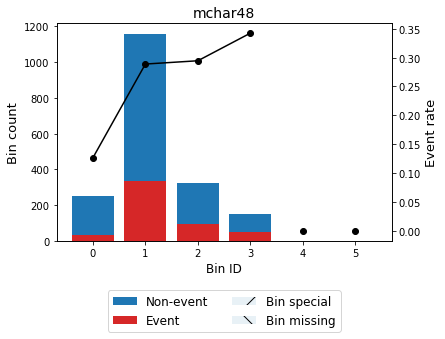

In [86]:
binning_table_1.plot(metric='event_rate')

In [87]:
df_clean['mchar48_woe'] = optb_1.transform(df_clean['mchar48'], metric='woe')

In [88]:
variable_cat_2 = 'mchar53'
x_cat_2 = df_clean[variable_cat_2].values
y_cat_2 = df_clean.GBI_2.values

optb_2 = OptimalBinning(name=variable_cat_2, dtype='categorical', solver='mip', divergence='iv', monotonic_trend='auto_asc_desc') #, cat_cutoff=0.1)

optb_2.fit(x_cat_2, y_cat_2)

binning_table_2 = optb_2.binning_table
binning_table_2.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[PENDIDIKAN_OWNER7, PENDIDIKAN_OWNER1, PENDIDI...",140,0.074153,108,32,0.228571,0.233137,0.003811,0.000475
1,[PENDIDIKAN_OWNER5],697,0.369174,503,194,0.278336,-0.030526,0.000346,0.000043
2,[PENDIDIKAN_OWNER3],798,0.422669,569,229,0.286967,-0.0731,0.002296,0.000287
3,"[PENDIDIKAN_OWNER2, PENDIDIKAN_OWNER4]",162,0.085805,113,49,0.302469,-0.147691,0.001933,0.000241
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,91,0.048199,81,10,0.109890,1.108606,0.043786,0.005209
Totals,,1888,1.000000,1374,514,0.272246,,0.052172,0.006256


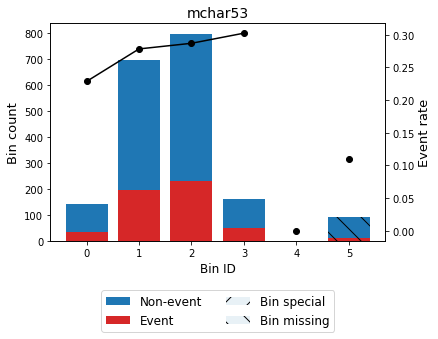

In [89]:
binning_table_2.plot(metric='event_rate')

In [90]:
df_clean['mchar53_woe'] = optb_2.transform(df_clean['mchar53'], metric='woe')

In [91]:
variable_cat_3 = 'mchar54'
x_cat_3 = df_clean[variable_cat_3].values
y_cat_3 = df_clean.GBI_2.values

optb_3 = OptimalBinning(name=variable_cat_3, dtype='categorical', solver='mip', divergence='iv', monotonic_trend='auto_asc_desc')

optb_3.fit(x_cat_3, y_cat_3)

binning_table_3 = optb_3.binning_table
binning_table_3.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[SEKTOR_EKONOMI51, SEKTOR_EKONOMI43, SEKTOR_EK...",375,0.198623,330,45,0.120000,1.009172,1.540259e-01,1.847570e-02
1,"[SEKTOR_EKONOMI4, SEKTOR_EKONOMI26, SEKTOR_EKO...",331,0.175318,241,90,0.271903,0.001729,5.239296e-07,6.549119e-08
2,"[SEKTOR_EKONOMI40, SEKTOR_EKONOMI14, SEKTOR_EK...",679,0.359640,474,205,0.301915,-0.145061,7.812183e-03,9.756676e-04
3,"[SEKTOR_EKONOMI2, SEKTOR_EKONOMI37]",103,0.054555,71,32,0.310680,-0.186314,1.971738e-03,2.461114e-04
4,"[SEKTOR_EKONOMI21, SEKTOR_EKONOMI13, SEKTOR_EK...",197,0.104343,130,67,0.340102,-0.320416,1.145038e-02,1.425206e-03
5,"[SEKTOR_EKONOMI42, SEKTOR_EKONOMI11, SEKTOR_EK...",147,0.077860,81,66,0.448980,-0.778464,5.406642e-02,6.592662e-03
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
7,Missing,56,0.029661,47,9,0.160714,0.669665,1.118137e-02,1.372127e-03
Totals,,1888,1.000000,1374,514,0.272246,,2.405085e-01,2.908754e-02


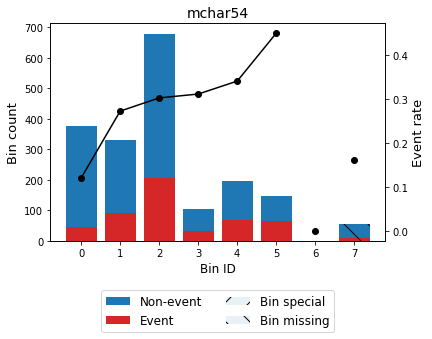

In [92]:
binning_table_3.plot(metric='event_rate')

In [93]:
df_clean['mchar54_woe'] = optb_3.transform(df_clean['mchar54'], metric='woe')

In [94]:
variable_cat_4 = 'mchar55'
x_cat_4 = df_clean[variable_cat_4].values
y_cat_4 = df_clean.GBI_2.values

optb_4 = OptimalBinning(name=variable_cat_4, dtype='categorical', solver='mip', divergence='iv', monotonic_trend='auto_asc_desc')

optb_4.fit(x_cat_4, y_cat_4)

binning_table_4 = optb_4.binning_table
binning_table_4.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[ALAMAT_ZIPCODE_OWNER3, ALAMAT_ZIPCODE_OWNER23...",102,0.054025,86,16,0.156863,0.6985,0.021977,0.002693
1,[ALAMAT_ZIPCODE_OWNER17],95,0.050318,76,19,0.200000,0.403036,0.007395,0.000918
2,"[ALAMAT_ZIPCODE_OWNER11, ALAMAT_ZIPCODE_OWNER2]",129,0.068326,101,28,0.217054,0.299658,0.005703,0.000710
3,"[ALAMAT_ZIPCODE_OWNER19, ALAMAT_ZIPCODE_OWNER10]",209,0.110699,157,52,0.248804,0.121744,0.001595,0.000199
4,[ALAMAT_ZIPCODE_OWNER7],115,0.060911,86,29,0.252174,0.103793,0.000640,0.000080
5,[ALAMAT_ZIPCODE_OWNER6],111,0.058792,83,28,0.252252,0.103378,0.000613,0.000077
6,[ALAMAT_ZIPCODE_OWNER9],100,0.052966,74,26,0.260000,0.06271,0.000205,0.000026
7,"[ALAMAT_ZIPCODE_OWNER22, ALAMAT_ZIPCODE_OWNER4]",116,0.061441,85,31,0.267241,0.025406,0.000039,0.000005
8,"[ALAMAT_ZIPCODE_OWNER13, ALAMAT_ZIPCODE_OWNER1...",161,0.085275,113,48,0.298137,-0.127071,0.001416,0.000177
9,"[ALAMAT_ZIPCODE_OWNER5, ALAMAT_ZIPCODE_OWNER14]",192,0.101695,129,63,0.328125,-0.266581,0.007646,0.000953


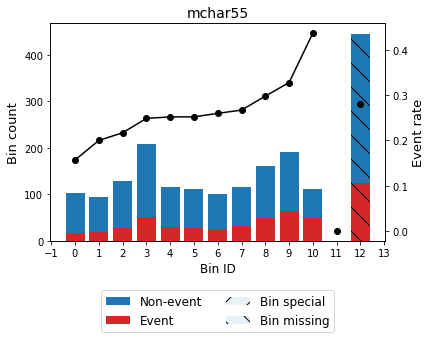

In [95]:
binning_table_4.plot(metric='event_rate')

In [96]:
df_clean['mchar55_woe'] = optb_4.transform(df_clean['mchar55'], metric='woe')

In [97]:
variable_cat_5 = 'mchar43'
x_cat_5 = df_clean[variable_cat_5].values
y_cat_5 = df_clean.GBI_2.values

optb_5 = OptimalBinning(name=variable_cat_5, dtype='categorical', solver='mip', divergence='iv', monotonic_trend='auto_asc_desc')

optb_5.fit(x_cat_5, y_cat_5)

binning_table_5 = optb_5.binning_table
binning_table_5.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[JNS_PRODUK11, JNS_PRODUK6, JNS_PRODUK24, JNS_...",217,0.114936,198,19,0.087558,1.36057,0.145771,0.016934
1,"[JNS_PRODUK15, JNS_PRODUK25, JNS_PRODUK9]",620,0.328390,446,174,0.280645,-0.041995,0.000585,0.000073
2,[JNS_PRODUK2],152,0.080508,108,44,0.289474,-0.085317,0.000597,0.000075
3,"[JNS_PRODUK21, JNS_PRODUK12, JNS_PRODUK18, JNS...",899,0.476165,622,277,0.308120,-0.174336,0.015031,0.001876
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1888,1.000000,1374,514,0.272246,,0.161984,0.018959


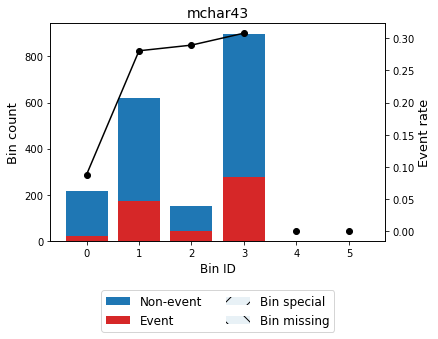

In [98]:
binning_table_5.plot(metric='event_rate')

In [99]:
df_clean['mchar43_woe'] = optb_5.transform(df_clean['mchar43'], metric='woe')

In [100]:
variable_cat_6 = 'mchar49'
x_cat_6 = df_clean[variable_cat_6].values
y_cat_6 = df_clean.GBI_2.values

optb_6 = OptimalBinning(name=variable_cat_6, dtype='categorical', solver='mip', divergence='iv', monotonic_trend='auto_asc_desc')

optb_6.fit(x_cat_6, y_cat_6)

binning_table_6 = optb_6.binning_table
binning_table_6.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[APPTYPEDESC1],1695,0.897775,1247,448,0.264307,0.040445,0.001455,0.000182
1,[APPTYPEDESC3],193,0.102225,127,66,0.341969,-0.328726,0.011826,0.001472
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1888,1.000000,1374,514,0.272246,,0.013280,0.001653


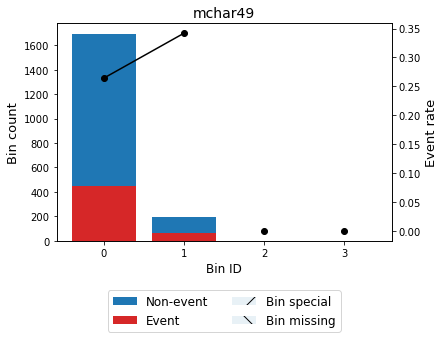

In [136]:
binning_table_6.plot(metric='event_rate')

In [101]:
df_clean['mchar49_woe'] = optb_6.transform(df_clean['mchar49'], metric='woe')

In [102]:
df_clean['open_date_2'] = pd.to_datetime(df_clean['open_date'], format = '%Y-%m-%d')
df_clean['open_date_2'] = df_clean['open_date_2'].dt.strftime('%Y-%m')

In [103]:
pd.set_option('display.max_rows', None)
df_br7 = pd.crosstab(df_clean['open_date_2'],df_clean['GBI_2'], margins=True, margins_name='sum')
df_br7['BadRate'] = round(df_br7[1]/df_br7['sum']*100,2)
df_br7.sort_values(by='open_date_2', ascending=True)

GBI_2,0.0,1.0,sum,BadRate
open_date_2,,,,
2010-01,7,1,8,12.50
2010-02,5,3,8,37.50
2010-03,8,1,9,11.11
2010-04,8,2,10,20.00
2010-05,11,2,13,15.38
2010-06,10,4,14,28.57
2010-07,9,3,12,25.00
2010-08,7,5,12,41.67
2010-09,6,3,9,33.33


In [104]:
OOT_cutoff = datetime.date(2015, 1, 1)

df_clean_dev = df_clean[pd.to_datetime(df_clean['open_date']).dt.date<OOT_cutoff]

df_clean_oot = df_clean[pd.to_datetime(df_clean['open_date']).dt.date>=OOT_cutoff]

print ('dev data size {}'.format(df_clean_dev.shape))
print ('oot data size {}'.format(df_clean_oot.shape))

dev data size (1726, 118)
oot data size (162, 118)


In [105]:
df_train, df_eval = train_test_split(df_clean_dev, test_size=0.3, shuffle=True, stratify=df_clean_dev['GBI_2'].values, random_state=69)

print('train data size{}'.format(df_train.shape))
print('eval data size{}'.format(df_eval.shape))

train data size(1208, 118)
eval data size(518, 118)


In [106]:
def get_gini(model, data, features, target):
    pred = model.predict_proba(data[features])[:, -1]
    auc = roc_auc_score(data[target], pred)
    return 2*auc-1

def get_shap_feature_importance(model, data, normalized=True):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(data)
    feature_importances = pd.DataFrame(columns=['Features', 'Importances'])
    feature_importances['Features'] = data.columns
    feature_importances['Importances'] = np.abs(shap_values).mean(axis=0)
    if normalized:
        feature_importances['Importances'] = feature_importances['Importances']/feature_importances['Importances'].sum()
    feature_importances = feature_importances.sort_values('Importances', ascending=False)
    return feature_importances

def get_feature_importance_bar_plot(feature_importances):
    feature_importances = feature_importances.sort_values('Importances', ascending=True)
    fig, ax = plt.subplots(figsize=(10,10))
    y_locs = np.arange(len(feature_importances))
    ax.barh(y_locs, feature_importances['Importances'].values)
    _ = ax.set(yticks=y_locs, yticklabels=feature_importances['Features'])
    plt.title('Feature Importances')
    ax.set_xlabel('Relative Importances')
    fig.show()

In [107]:
df_train.columns.values.tolist()

['ID',
 'date_time_posisi_PD',
 'GBI',
 'max_kol',
 'open_date',
 'MATDAT',
 'mchar1',
 'mchar2',
 'mchar3',
 'mchar4',
 'mchar5',
 'mchar6',
 'mchar7',
 'mchar8',
 'mchar9',
 'mchar10',
 'mchar11',
 'mchar12',
 'mchar13',
 'mchar14',
 'mchar15',
 'mchar16',
 'mchar17',
 'mchar18',
 'mchar19',
 'mchar20',
 'mchar21',
 'mchar22',
 'mchar23',
 'mchar24',
 'mchar25',
 'mchar26',
 'mchar27',
 'mchar28',
 'mchar29',
 'mchar30',
 'mchar31',
 'mchar32',
 'mchar33',
 'mchar34',
 'mchar35',
 'mchar36',
 'mchar37',
 'mchar38',
 'mchar39',
 'mchar40',
 'mchar41',
 'mchar42',
 'mchar43',
 'mchar44',
 'mchar46',
 'mchar48',
 'mchar49',
 'mchar53',
 'mchar54',
 'mchar55',
 'mchar57',
 'mchar58',
 'char43 (Jenis Produk)',
 'char48 (Bentuk Usaha)',
 'Char 49 (Apptype)',
 'char54 (Sektor Ekonomi )',
 'Char 55 (Provinsi)',
 'period',
 'char1',
 'char2',
 'char3',
 'char5',
 'char4',
 'char11',
 'char6',
 'char7',
 'char8',
 'char9',
 'char10',
 'char17',
 'char12',
 'char13',
 'char14',
 'char15',
 'cha

In [108]:
target = ['GBI_2']
unused = ['ID', 'date_time_posisi_PD', 'GBI', 'max_kol', 'open_date', 'MATDAT', 'period', 'GBI_trans', 'Gbi_Behv', 'ket', 'open_date_2']
categorical = ['mchar43', 'mchar48', 'mchar49', 'mchar53', 'mchar54', 'mchar55', 'char43 (Jenis Produk)', 'char48 (Bentuk Usaha)', 'Char 49 (Apptype)', 'char54 (Sektor Ekonomi )', 'Char 55 (Provinsi)']

In [109]:
training_features = list(set(df_train.columns.tolist()) - set(target) - set(unused) - set(categorical))

In [110]:
default_params = {'n_estimators': 50,
                 'max_depth':2,
                 'reg_lambda': 3,
                 'reg_alpha': 0,
                 'learning_rate': 0.1,
                 'colsample_bylevel': 1,
                 'eval_metric': 'auc'}

baseline_model = xgb.XGBClassifier(**default_params)

print ('Training Baseline Model')
baseline_model.fit(df_train[training_features], df_train[target])
train_gini = get_gini(baseline_model, df_train, training_features, target)
eval_gini = get_gini(baseline_model, df_eval, training_features, target)
oot_gini = get_gini(baseline_model, df_clean_oot, training_features, target)

train_AUC = (train_gini+1)/2
eval_AUC = (eval_gini+1)/2
oot_AUC = (oot_gini+1)/2

print ('Baseline model Train GINI {}'.format(round(train_gini,2)), ', Train AUC {}'.format(round(train_AUC,2)))
print ('Baseline model Eval GINI {}'.format(round(eval_gini,2)), ', Eval AUC {}'.format(round(eval_AUC,2)))
print ('Baseline model OOT GINI {}'.format(round(oot_gini,2)), ', OOT AUC {}'.format(round(oot_AUC,2)))


Training Baseline Model
Baseline model Train GINI 0.68 , Train AUC 0.84
Baseline model Eval GINI 0.53 , Eval AUC 0.77
Baseline model OOT GINI 0.51 , OOT AUC 0.76


In [111]:
feature_importances = get_shap_feature_importance(baseline_model, df_train[training_features]).reset_index(drop=True)
feature_importances.head(20)

,Features,Importances
0,mchar54_woe,0.084527
1,mchar28,0.081442
2,mchar35,0.067087
3,mchar19,0.062960
4,mchar37,0.062677
5,mchar18,0.059892
6,mchar15,0.053103
7,char29,0.049682
8,mchar13,0.044583
9,mchar34,0.040947


In [112]:
train_data_corr = df_train[feature_importances['Features']].corr()
#train_data_corr

# remove correlated features
corr_thres = 0.6
drop_features = []
for i, feat in enumerate(feature_importances['Features']):
    if feat in drop_features:
        continue
    correlated_features = train_data_corr[feat].iloc[i+1:][abs(train_data_corr[feat].iloc[i+1:])>corr_thres]
    
    if len(correlated_features) > 0:
        drop_features.extend(correlated_features.index.tolist())
        print ('these features dropped because correlated to {}'.format(feat))
        print (correlated_features.index.tolist())

these features dropped because correlated to mchar28
['mchar19', 'mchar18', 'mchar15', 'mchar13', 'mchar16', 'mchar6', 'mchar27', 'mchar12', 'mchar9', 'mchar25', 'mchar21', 'mchar8', 'mchar7', 'mchar20', 'mchar5', 'mchar29', 'mchar22', 'mchar11', 'mchar26', 'mchar14', 'mchar24', 'mchar17', 'mchar10', 'mchar23']
these features dropped because correlated to mchar35
['mchar34', 'mchar32', 'mchar30', 'mchar31', 'mchar33']
these features dropped because correlated to mchar37
['mchar38', 'mchar44', 'mchar41', 'mchar36']
these features dropped because correlated to char29
['char25', 'char43', 'char28', 'char27', 'char24', 'char26', 'char39']
these features dropped because correlated to mchar3
['mchar2', 'mchar4']
these features dropped because correlated to mchar43_woe
['mchar48_woe']
these features dropped because correlated to char19
['char23', 'char20', 'char21', 'char22', 'char18']
these features dropped because correlated to char35
['char32', 'char34', 'char7', 'char16', 'char15', 'char1

In [113]:
drop_features = set(drop_features)
training_features_2 = list(set(training_features) - drop_features)
print ('training features after removing correlated features= {}'.format(len(training_features_2)))

training features after removing correlated features= 32


In [114]:
model_v2 = xgb.XGBClassifier(**default_params)

print ('Training V2 Model')
model_v2.fit(df_train[training_features_2], df_train[target])
train_gini = get_gini(model_v2, df_train, training_features_2, target)
eval_gini = get_gini(model_v2, df_eval, training_features_2, target)
oot_gini = get_gini(model_v2, df_clean_oot, training_features_2, target)

train_AUC = (train_gini+1)/2
eval_AUC = (eval_gini+1)/2
oot_AUC = (oot_gini+1)/2

print ('Baseline model Train GINI {}'.format(round(train_gini,2)), ', Train AUC {}'.format(round(train_AUC,2)))
print ('Baseline model Eval GINI {}'.format(round(eval_gini,2)), ', Eval AUC {}'.format(round(eval_AUC,2)))
print ('Baseline model OOT GINI {}'.format(round(oot_gini,2)), ', OOT AUC {}'.format(round(oot_AUC,2)))

Training V2 Model
Baseline model Train GINI 0.66 , Train AUC 0.83
Baseline model Eval GINI 0.52 , Eval AUC 0.76
Baseline model OOT GINI 0.46 , OOT AUC 0.73


In [115]:
feature_importances_2 = get_shap_feature_importance(model_v2, df_train[training_features_2]).reset_index(drop=True)
feature_importances_2.head(20)

,Features,Importances
0,mchar28,0.293675
1,mchar35,0.163841
2,mchar54_woe,0.102434
3,mchar37,0.089614
4,char29,0.053809
5,mchar55_woe,0.043900
6,mchar3,0.039346
7,mchar46,0.032706
8,char35,0.024093
9,char42,0.019836


In [116]:
#filter features with threshold importances
min_importance_threshold = 0.001
feature_importances_3 = feature_importances_2[feature_importances_2['Importances']>min_importance_threshold]
print ('number of features left after threshold cut off: {}'.format(len(feature_importances_3)))
training_features_3 = feature_importances_3.sort_values('Importances', ascending=False)['Features'].tolist()

number of features left after threshold cut off: 24


In [117]:
final_model = xgb.XGBClassifier(**default_params)

print ('Training Final Model')
final_model.fit(df_train[training_features_3], df_train[target])
train_gini = get_gini(final_model, df_train, training_features_3, target)
eval_gini = get_gini(final_model, df_eval, training_features_3, target)
oot_gini = get_gini(final_model, df_clean_oot, training_features_3, target)

train_AUC = (train_gini+1)/2
eval_AUC = (eval_gini+1)/2
oot_AUC = (oot_gini+1)/2

print ('Baseline model Train GINI {}'.format(round(train_gini,2)), ', Train AUC {}'.format(round(train_AUC,2)))
print ('Baseline model Eval GINI {}'.format(round(eval_gini,2)), ', Eval AUC {}'.format(round(eval_AUC,2)))
print ('Baseline model OOT GINI {}'.format(round(oot_gini,2)), ', OOT AUC {}'.format(round(oot_AUC,2)))

Training Final Model
Baseline model Train GINI 0.66 , Train AUC 0.83
Baseline model Eval GINI 0.52 , Eval AUC 0.76
Baseline model OOT GINI 0.46 , OOT AUC 0.73


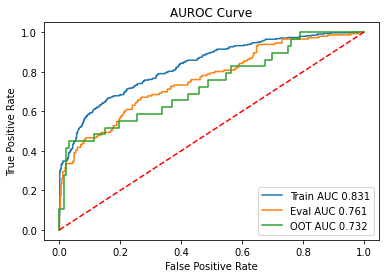

In [118]:
fig, ax = plt.subplots()
label =['Train', 'Eval', 'OOT']
for i, data in enumerate([df_train, df_eval, df_clean_oot]):
    pred = final_model.predict_proba(data[training_features_3])[:, -1]
    auc = round(roc_auc_score(data[target], pred), 3)
    fpr, tpr, _ = roc_curve(data[target], pred)
    ax.plot(fpr, tpr, label=f'{label[i]} AUC {auc}')
ax.plot([0, 1], [0,1], '--', color='r')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc = 'lower right')
ax.set_title('AUROC Curve')
fig.show()

In [119]:
def shap_summary_plot(model, data, features):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(data[features])
    shap.summary_plot(shap_values, data[features])

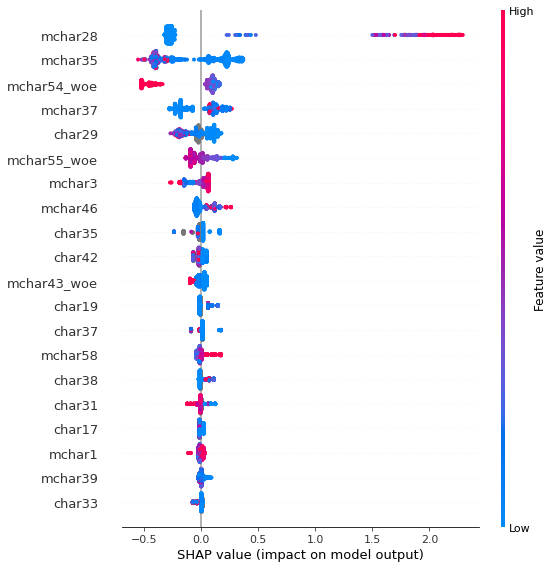

In [120]:
shap_summary_plot(final_model, df_train, training_features_3)

In [121]:
base_score=600
beta=50
upper=900
lower=300

beta=beta/np.log(2)
alpha=base_score+beta*np.log(0.2)

df_train['y_pred_train'] = final_model.predict_proba(df_train[training_features_3])[:, -1]
df_train['y_score'] = alpha-beta*np.log(df_train['y_pred_train']/(1-df_train['y_pred_train']))
min_score = min(df_train['y_score'])
max_score = max(df_train['y_score'])
df_train['y_score'].describe()

count    1208.000000
mean      558.355042
std        70.946182
min       303.924133
25%       546.112305
50%       574.079346
75%       598.083435
max       672.089478
Name: y_score, dtype: float64

<AxesSubplot:xlabel='y_score', ylabel='Count'>

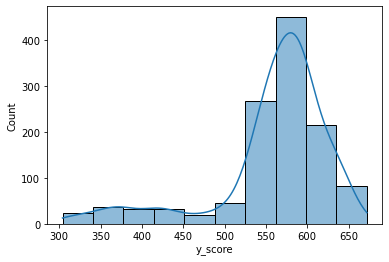

In [122]:
sns.histplot(data=df_train, x='y_score', kde=True, bins=10)

In [123]:
df_eval['y_pred_eval'] = final_model.predict_proba(df_eval[training_features_3])[:, -1]
df_eval['y_score'] = alpha-beta*np.log(df_eval['y_pred_eval']/(1-df_eval['y_pred_eval']))
df_eval['y_score'].describe()

count    518.000000
mean     557.632080
std       66.913185
min      327.602905
25%      541.702789
50%      572.494873
75%      595.814087
max      690.640198
Name: y_score, dtype: float64

<AxesSubplot:xlabel='y_score', ylabel='Count'>

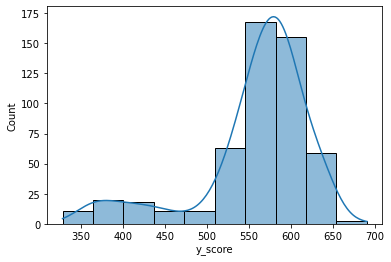

In [124]:
sns.histplot(data=df_eval, x='y_score', kde=True, bins=10)

In [135]:
pip install scorecardpy

  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-py3-none-any.whl size=57827 sha256=692ce79e31e5cb9dccdede80a8e721ea7af2fff6f953c6f15b3c2c6417b2fe9f
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\18\b9\40\9fc7fa3ee628a20fb571991f96d54997cfbfab13e752bacd84
Successfully built scorecardpy
Note: you may need to restart the kernel to use updated packages.


In [128]:
df_clean['y_pred'] = final_model.predict_proba(df_clean[training_features_3])[:, -1]

df_clean['y_score']=alpha-beta*np.log(df_clean['y_pred']/(1-df_clean['y_pred']))
df_clean['y_score_2']=(df_clean['y_score']-min_score)/(max_score-min_score)*(upper+lower)/2+lower
print(min(df_clean['y_score_2']), max(df_clean['y_score_2']))
df_clean['y_score_2'].describe()

300.0 930.2321166992188


count    1888.000000
mean      715.069031
std       112.489273
min       300.000000
25%       694.694702
50%       740.423004
75%       777.351837
max       930.232117
Name: y_score_2, dtype: float64

<AxesSubplot:xlabel='y_score_2', ylabel='Count'>

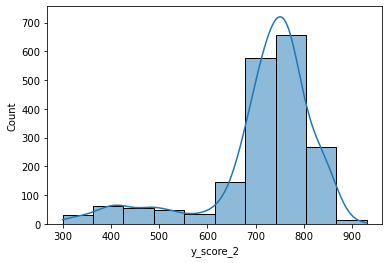

In [129]:
sns.histplot(data=df_clean, x='y_score_2', kde=True, bins=10)

In [130]:
def create_cutoff_analysis(data, target_name, score_name):
    logreg_data = data.copy()
    logreg_data['score_bin'] = pd.cut(logreg_data[score_name], bins=np.arange(300, 901, 50), include_lowest=True)
    logreg_cutoff = logreg_data.groupby('score_bin').agg({target_name: ['sum', 'count']}).reset_index()
    logreg_cutoff['grade'] = list(range(12, 0, -1))
    logreg_cutoff.columns = ['score_bin', 'bad_count', 'total', 'grade']
    logreg_cutoff['good_count'] = logreg_cutoff['total'] - logreg_cutoff['bad_count']
    #logreg_cutoff['cum_bad'] = logreg_cutoff['bad_count'][::-1].cumsum()
    logreg_cutoff['cum_bad'] = logreg_cutoff['bad_count'].cumsum()
    logreg_cutoff['%_cum_bad'] = logreg_cutoff['cum_bad']/logreg_cutoff['bad_count'].sum()
    #logreg_cutoff['cum_total'] = logreg_cutoff['total'][::-1].cumsum()
    logreg_cutoff['cum_total'] = logreg_cutoff['total'].cumsum()
    #logreg_cutoff['cum_good'] = logreg_cutoff['good_count'][::-1].cumsum()
    logreg_cutoff['cum_good'] = logreg_cutoff['good_count'].cumsum()
    logreg_cutoff['%_cum_good'] = logreg_cutoff['cum_good']/logreg_cutoff['good_count'].sum()
    logreg_cutoff['ks'] = abs(logreg_cutoff['%_cum_good'] - logreg_cutoff['%_cum_bad'])
    #logreg_cutoff['acceptance_rate'] = logreg_cutoff['cum_total']/logreg_cutoff['total'].sum()
    #logreg_cutoff['badrate_portfolio'] =logreg_cutoff['cum_bad']/logreg_cutoff['cum_total']
    logreg_cutoff['badrate_score_bin'] = logreg_cutoff['bad_count']/logreg_cutoff['total']
    logreg_cutoff['%_total'] = logreg_cutoff['total']/logreg_cutoff['total'].sum()
    logreg_cutoff = logreg_cutoff.set_index('grade', drop=True)
    #logreg_cutoff = logreg_cutoff[['score_bin', 'bad_count', 'cum_bad', '%_cum_bad', 'total', '%_total', 
                                   #'cum_total','good_count', '%_cum_good', 'ks', 'acceptance_rate', 'badrate_portfolio', 
                                   #'badrate_score_bin']]
    #logreg_cutoff = logreg_cutoff[['score_bin', 'total', 'cum_total', '%_total', 'bad_count', 'cum_bad', '%_cum_bad', 
                                   #'good_count', 'cum_good', '%_cum_good', 'ks', 'badrate_portfolio', 
                                   #'badrate_score_bin']]
    logreg_cutoff = logreg_cutoff[['score_bin', 'total', 'cum_total', '%_total', 'bad_count', 'cum_bad', '%_cum_bad', 
                                   'good_count', 'cum_good', '%_cum_good', 'ks', 
                                   'badrate_score_bin']]
    return logreg_cutoff

In [131]:
xgb_cutoff = create_cutoff_analysis(df_clean, 'GBI_2', 'y_score_2')
xgb_cutoff

,score_bin,total,cum_total,%_total,bad_count,cum_bad,%_cum_bad,good_count,cum_good,%_cum_good,ks,badrate_score_bin
grade,,,,,,,,,,,,
12,"(299.999, 350.0]",23,23,0.012189,23.0,23.0,0.044747,0.0,0.0,0.000000,0.044747,1.000000
11,"(350.0, 400.0]",40,63,0.021198,38.0,61.0,0.118677,2.0,2.0,0.001457,0.117220,0.950000
10,"(400.0, 450.0]",51,114,0.027027,48.0,109.0,0.212062,3.0,5.0,0.003642,0.208421,0.941176
9,"(450.0, 500.0]",45,159,0.023847,41.0,150.0,0.291829,4.0,9.0,0.006555,0.285274,0.911111
8,"(500.0, 550.0]",37,196,0.019608,25.0,175.0,0.340467,12.0,21.0,0.015295,0.325172,0.675676
7,"(550.0, 600.0]",26,222,0.013778,8.0,183.0,0.356031,18.0,39.0,0.028405,0.327626,0.307692
6,"(600.0, 650.0]",56,278,0.029677,31.0,214.0,0.416342,25.0,64.0,0.046613,0.369729,0.553571
5,"(650.0, 700.0]",231,509,0.122417,92.0,306.0,0.595331,139.0,203.0,0.147851,0.447479,0.398268
4,"(700.0, 750.0]",542,1051,0.287228,121.0,427.0,0.830739,421.0,624.0,0.454479,0.376260,0.223247


In [132]:
print ('KS is {}'.format(xgb_cutoff['ks'].replace(np.inf, np.nan).max()))

KS is 0.44747931905197796


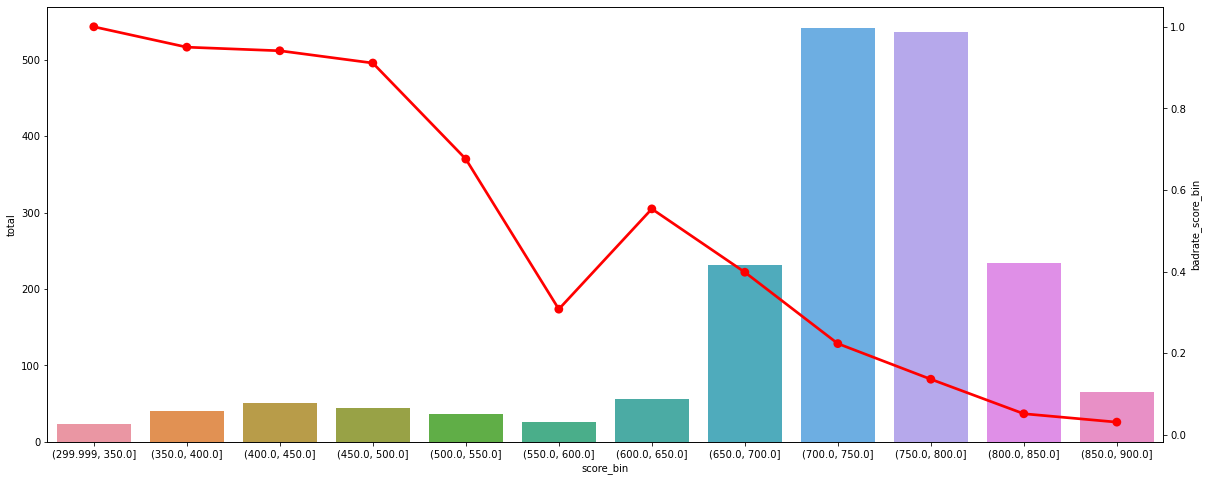

In [133]:
fig=plt.figure(figsize=(20,8))
ax1 = sns.barplot(x='score_bin', y='total', data=xgb_cutoff)
ax2 = ax1.twinx()
sns.pointplot(x='score_bin', y='badrate_score_bin', data=xgb_cutoff, ax=ax2, color='red')

plt.show()

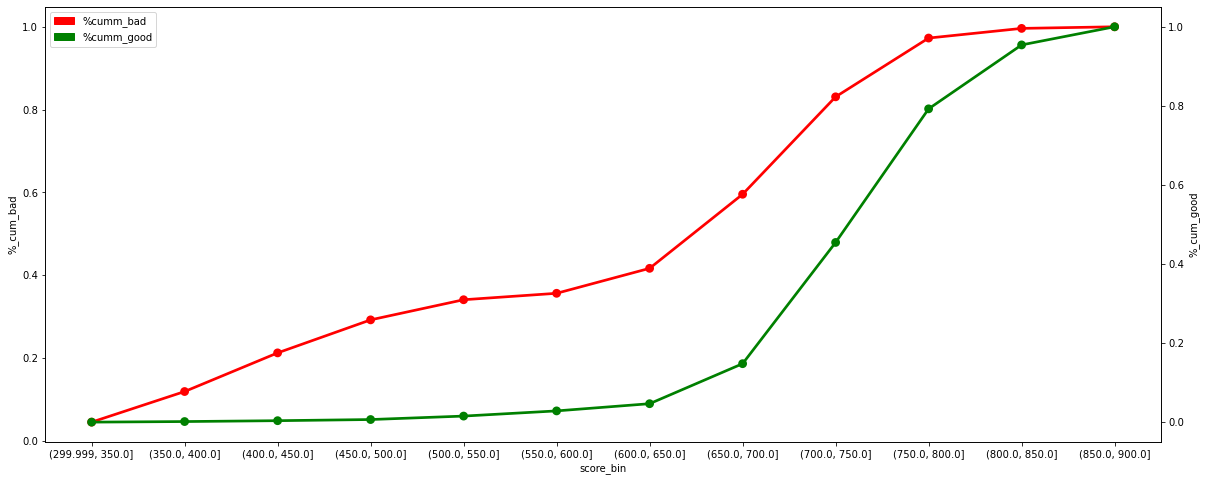

In [134]:
fig=plt.figure(figsize=(20,8))
ax1 = sns.pointplot(x='score_bin', y='%_cum_bad', data=xgb_cutoff, color='red')
ax2 = ax1.twinx()
sns.pointplot(x='score_bin', y='%_cum_good', data=xgb_cutoff, ax=ax2, color='green')
red_patch = mpatches.Patch(color='red', label='%cumm_bad')
green_patch = mpatches.Patch(color='green', label='%cumm_good')
plt.legend(handles=[red_patch, green_patch])
plt.show()

In [ ]:
psi = get_psi(df_train, df_eval, 'y_score', nbins=10)
print(psi, '\n')
print ('PSI is {}'.format(psi['psi'].replace(np.inf, np.nan).sum()))